<a href="https://colab.research.google.com/github/dibend/Colab/blob/main/AMZN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


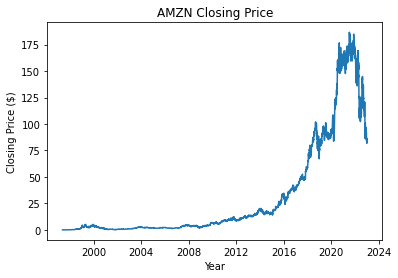

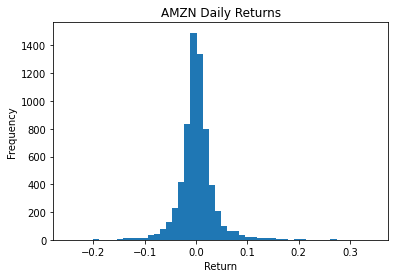

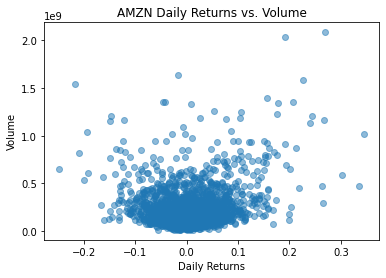

In [2]:
# First, install yfinance if it is not already installed
!pip install yfinance

# Now, let's import the necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt

# Next, we'll retrieve the stock data for AMZN
stock_data = yf.Ticker("AMZN").history(period="max")

# Now, let's plot the closing price over time
plt.plot(stock_data['Close'])
plt.title('AMZN Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price ($)')
plt.show()

# We can also plot the daily return distribution using a histogram
plt.hist(stock_data['Close'].pct_change(), bins=50)
plt.title('AMZN Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.show()

# Finally, let's create a scatterplot of the daily returns
plt.scatter(stock_data['Close'].pct_change(), stock_data['Volume'], alpha=0.5)
plt.title('AMZN Daily Returns vs. Volume')
plt.xlabel('Daily Returns')
plt.ylabel('Volume')
plt.show()
